  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="left">
                <font size=25px>
                    <b>  Solution to Decision Tree Classification Problem
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Problem Statement:
The objective of the dataset is to predict a students chance to get into a particular university 

The data set contains several parameters which are considered important during the application of Masters program, and is inspired by the UCLA Graduate data set

The dataset consists of several predictor variables and one target variable, Chance of Admit. The target variable has values ranging from 0 to 1, the value determines the probability of a student getting into that university

## Data Definition:
 
The real-valued features are as follows:

1) **GRE Scores:** GRE score (out of 340) of a student <br>
2) **University Rating:** University rating on a 1 to 5 scale<br>
3) **TOEFL Scores:** TOEFL score (out of 120) of a student<br>
4) **Statement of Purpose and Letter of Recommendation Strength:** measuring the recommendation strength on scale of 5<br>
5) **Undergraduate GPA:** GPA of a student in undergraduate course, measured on a 10 point scale<br>
6) **Research Experience:** either 0 or 1, which means yes or now whether a students has a research experience<br>

Output variable (desired target):

11) **Chance of Admit** - values ranging from 0 to 1, which gives the probability of getting into the chosen university

## Content

1. **[Import Libraries](#import_lib)**
2. **[Exploratory Data Analysis](#exploratory)**
3. **[Building a DT model](#model)**

<a id='import_lib'></a>
## 1. Import Libraries

In [18]:
# Numpy library is used to work with arrays and also has functions for working in domain of linear algebra
import numpy as np

# Pandas library provides easy to use data structures and data analysis tools
import pandas as pd

# Matplotlib library is used for plotting graphs 
import matplotlib.pyplot as plt

# Seaborn library is used for generating visualizations and is based on matplotlib
import seaborn as sns

# Importing the library to split the data into train and test sets
from sklearn.model_selection import train_test_split

In [2]:
# Let us read the data
admission = pd.read_csv('admission.csv')

<a id='exploratory'></a>
## 2. Exploratory Data Analysis (EDA)

In [3]:
# Ques 1 a) Visualizing the 10 random rows from the data set
admission.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
452,453,328,116,4,5.0,3.5,9.60,1,0.93
306,307,323,110,3,4.0,3.5,9.10,1,0.79
443,444,321,114,5,4.5,4.5,9.16,1,0.87
43,44,332,117,4,4.5,4.0,9.10,0,0.87
57,58,298,99,2,4.0,2.0,7.60,0,0.46
49,50,327,111,4,3.0,4.0,8.40,1,0.78
450,451,320,112,4,3.0,4.5,8.86,1,0.82
281,282,317,110,3,4.0,4.5,9.11,1,0.80
87,88,317,107,2,3.5,3.0,8.28,0,0.66
136,137,312,103,3,5.0,4.0,8.45,0,0.76


In [5]:
# Let us take a look at the data types of the variables
admission.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [4]:
# Ques 1 b) Generate the description for numeric variables
admission.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


All the variables in the data set are numerical, so we can see here the statistics for all the variables

In [6]:
# Ques 1 c) Check the shape of the data set
admission.shape

(500, 9)

Here we can see that we have 500 observations and 9 attributes in the data set

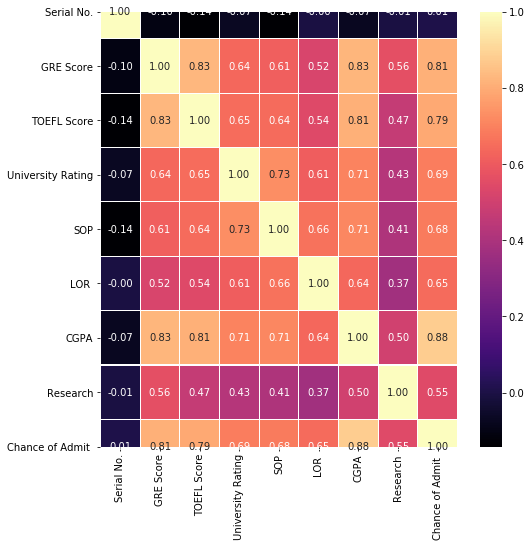

In [7]:
# Ques 1 d) Generate the correlation matrix
plt.figure(figsize =(8, 8))
sns.heatmap(admission.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

The attribute 'Serial no' does not contribute significantly towards the analysis so we can drop this column

In [8]:
# Dropping the 'Serial no' attribute 
admission.drop('Serial No.', axis = 1, inplace = True)

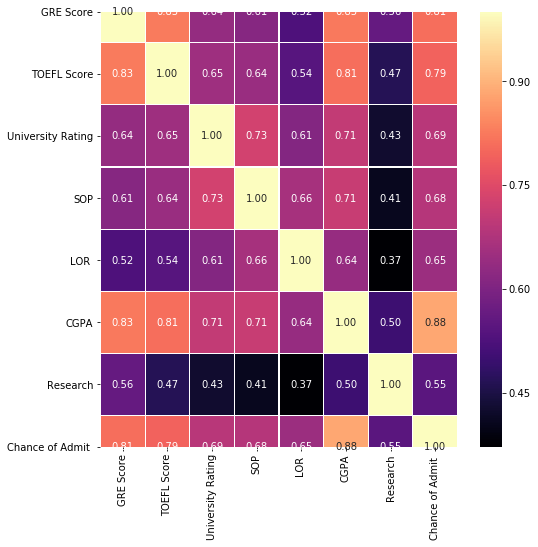

In [9]:
# Again generating the correlation matrix
plt.figure(figsize =(8, 8))
sns.heatmap(admission.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

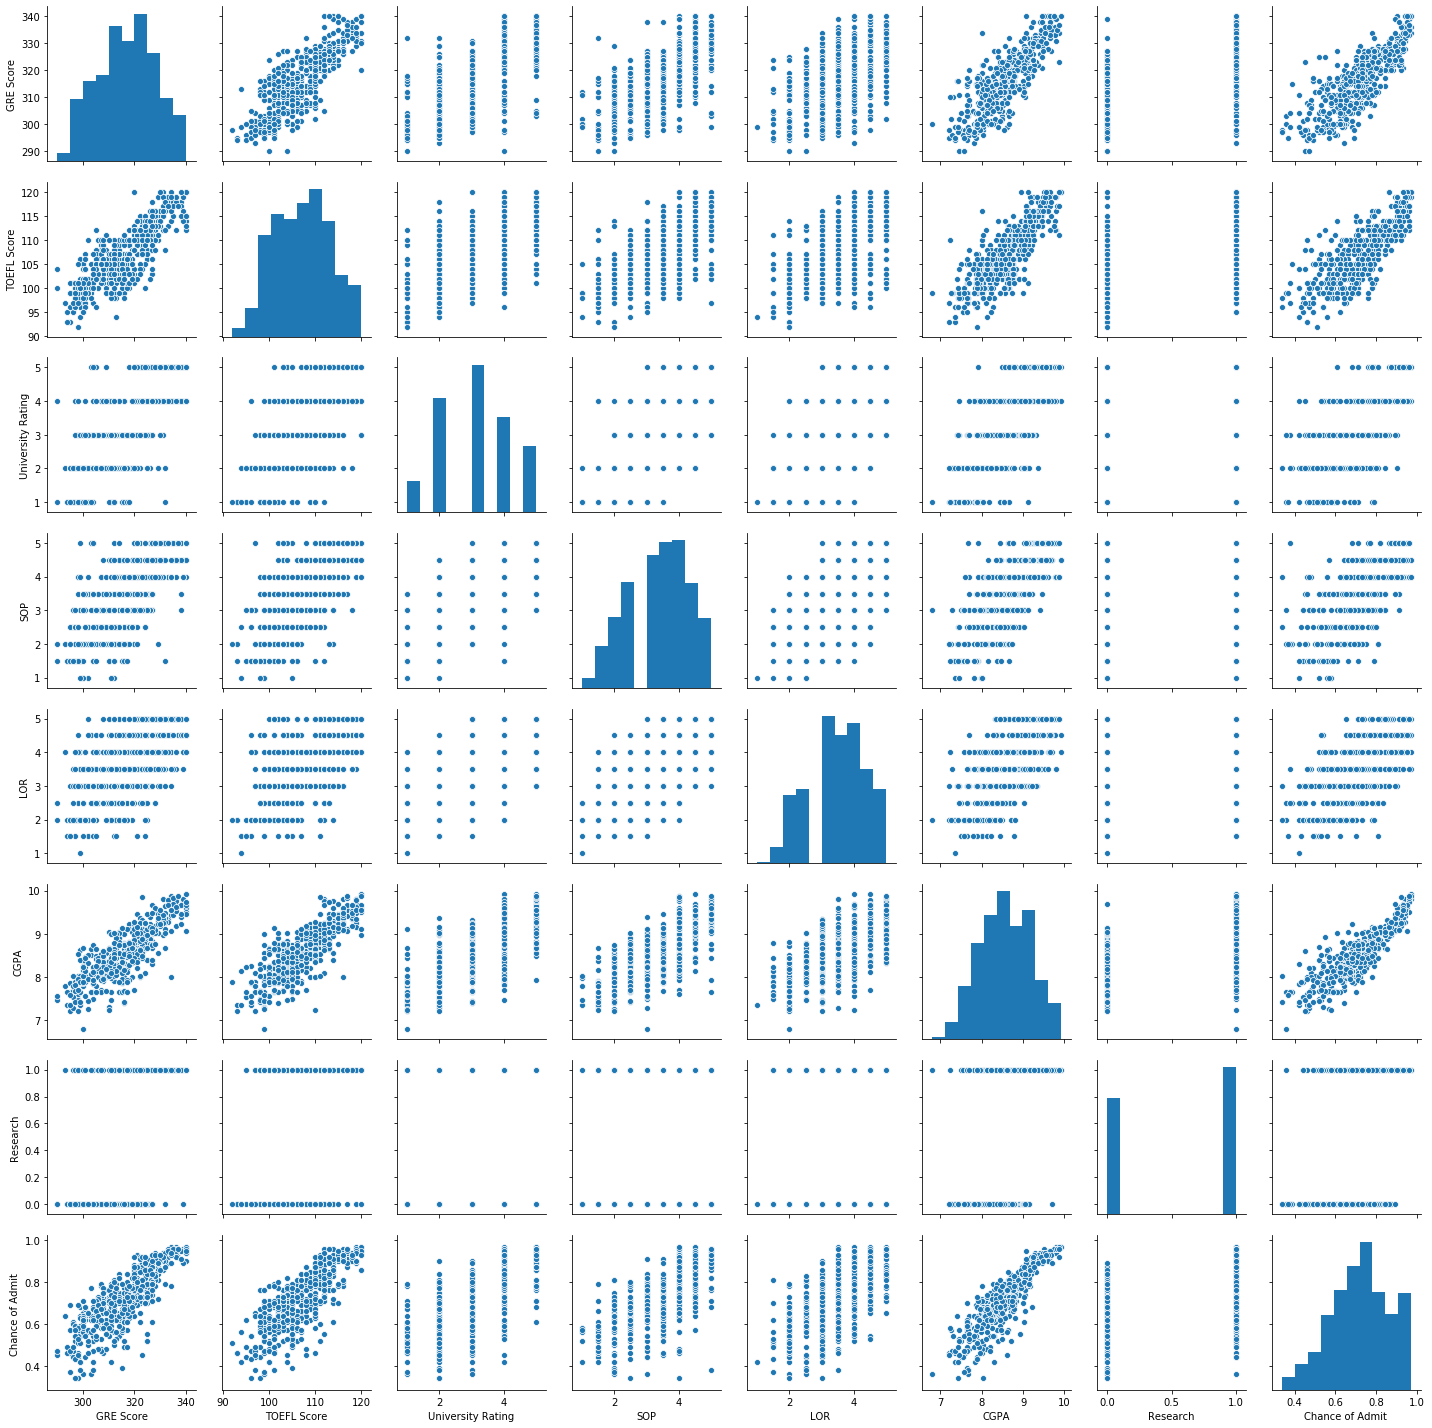

In [10]:
# Ques 1 e) Generate a correlogram
sns.pairplot(admission)
plt.show()

Here we can see the histogram for each variable as well as the scatter plots

In [13]:
# Ques 2) Minimum and maximum values for GRE score
print("Max GREScore :", max(admission['GRE Score']))
print("Min GREScore :", min(admission['GRE Score']))

Max GREScore : 340
Min GREScore : 290


In [14]:
# Ques 2) Minimum and maximum values for TOEFL score
print("Max GREScore :", max(admission['TOEFL Score']))
print("Min GREScore :", min(admission['TOEFL Score']))

Max GREScore : 120
Min GREScore : 92


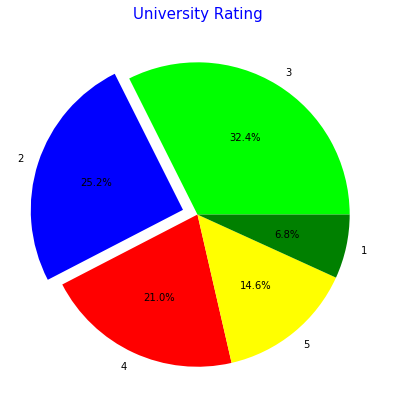

In [15]:
# Percentage of universities for each universtiy rating
colors = ['lime','blue','red','yellow','green']
explode = [0,0.1,0,0,0]
plt.figure(figsize = (7,7))
plt.pie(admission['University Rating'].value_counts().values, explode = explode, labels = admission['University Rating'].value_counts().index, colors = colors, autopct ='%1.1f%%')
plt.title('University Rating',color='blue',fontsize=15)
plt.show()

Here we can see that most of universities have a rating of '3' while there are very few universities having a rating of '1' and '5'

In [19]:
# Ques 4) Converting the target variable 'Chance of Admit' to categorical
# In order to perform this, we will first separate the target variable

# Set of independent variables
x = admission.iloc[:,:-1]

# Target variable
y = admission.iloc[:,-1]

# Splitting the data into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 100)

In [20]:
# Converting the target variable to categorical having values 0 and 1
y_train_c = [1 if each > 0.80 else 0 for each in y_train]
y_test_c = [1 if each > 0.80 else 0 for each in y_test]

<a id='model'></a>
## 3. Building a DT model

In [22]:
# Ques 5) Build a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Creating a decision tree classifier
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5) 

In [23]:
# Training the model 
clf_fit = clf_entropy.fit(x_train, y_train_c) 

# Predicting the chance of admission
y_pred = clf_fit.predict(x_test) 

In [24]:
# Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test_c, y_pred)

0.91

### Perform Hyperparameter Tuning

In [25]:
# Again creating a decision tree classifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 200, max_depth = 4, min_samples_leaf = 10)

In [26]:
# Training the model 
clf_fit_2 = clf_gini.fit(x_train, y_train_c) 

# Predicting the chance of admission
y_pred_2 = clf_fit_2.predict(x_test) 

In [27]:
# Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test_c, y_pred_2)

0.94

We can see here that by changing the values of the parameter, there is a slight increase in the accuracy. Earlier we were using 'Entropy' as criterion, now we are using 'Gini' as criterion, the max depth of the tree has been increased and so on. Similarly, we can keep on tuning the parameters, to obtain the highest accuracy.